<a href="https://colab.research.google.com/github/Amit-Padye/Mobile-Price-Range-Prediction/blob/main/Capstone_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

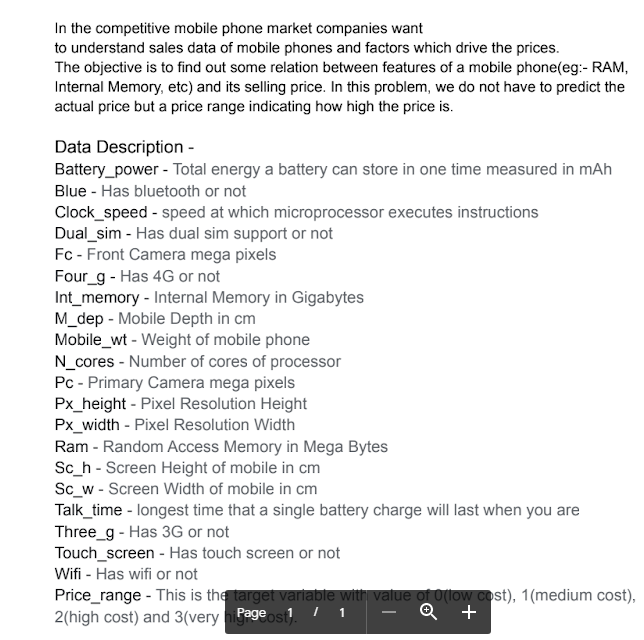

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



In [4]:
df=pd.read_csv('/content/drive/MyDrive/data_mobile_price_range.csv')

In [6]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [53]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [22]:
df[df['price_range']==0].describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.0
mean,1116.902000,0.486000,1.550200,0.500000,4.084000,0.518000,31.174000,0.490200,140.552000,4.600000,9.574000,536.408000,1150.27000,785.314000,12.324000,5.682000,10.612000,0.746000,0.524000,0.496000,0.0
std,410.801305,0.500305,0.848941,0.500501,4.183772,0.500176,18.101023,0.288184,36.378319,2.268544,6.095805,372.824164,413.00178,362.755397,4.206949,4.174173,5.397009,0.435734,0.499924,0.500485,0.0
min,503.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,1.000000,500.00000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.0
25%,770.500000,0.000000,0.600000,0.000000,1.000000,0.000000,15.000000,0.200000,108.750000,3.000000,4.000000,229.000000,805.75000,488.750000,9.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.0
50%,1066.000000,0.000000,1.550000,0.500000,3.000000,1.000000,30.000000,0.500000,142.000000,5.000000,9.500000,465.500000,1132.50000,719.500000,12.000000,5.000000,10.000000,1.000000,1.000000,0.000000,0.0
75%,1431.250000,1.000000,2.300000,1.000000,6.000000,1.000000,47.000000,0.700000,173.000000,7.000000,15.000000,776.500000,1452.75000,1037.000000,16.000000,8.250000,15.000000,1.000000,1.000000,1.000000,0.0
max,1994.000000,1.000000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1878.000000,1989.00000,1974.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,0.0


In [23]:
df[df['price_range']==1].describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.0
mean,1228.868000,0.490000,1.488600,0.510000,4.340000,0.524000,32.116000,0.524000,140.510000,4.298000,9.924000,666.892000,1251.908000,1679.490000,12.212000,5.544000,11.362000,0.756000,0.522000,0.504000,1.0
std,438.614528,0.500401,0.814479,0.500401,4.499432,0.499924,18.000739,0.286895,35.678956,2.311684,6.124806,441.351209,433.564352,465.850159,4.226913,4.238868,5.570729,0.429923,0.500016,0.500485,0.0
min,501.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,387.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.0
25%,843.000000,0.000000,0.600000,0.000000,1.000000,0.000000,16.000000,0.300000,109.000000,2.000000,4.000000,327.250000,878.750000,1354.000000,8.000000,2.000000,7.000000,1.000000,0.000000,0.000000,1.0
50%,1206.000000,0.000000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,606.000000,1223.000000,1686.500000,12.000000,5.000000,12.000000,1.000000,1.000000,1.000000,1.0
75%,1596.250000,1.000000,2.200000,1.000000,7.000000,1.000000,47.000000,0.800000,170.000000,6.000000,15.000000,944.250000,1629.000000,2033.750000,16.000000,8.000000,16.000000,1.000000,1.000000,1.000000,1.0
max,1996.000000,1.000000,3.000000,1.000000,18.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1914.000000,1998.000000,2811.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,1.0


In [24]:
df[df['price_range']==2].describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.0
mean,1228.320000,0.486000,1.529800,0.498000,4.49800,0.494000,30.920000,0.490800,143.614000,4.682000,10.018000,632.284000,1234.046000,2582.816000,12.010000,5.714000,10.97200,0.774000,0.470000,0.504000,2.0
std,452.863065,0.500305,0.804404,0.500497,4.34739,0.500465,18.441958,0.286215,34.320326,2.262546,5.952861,445.789232,427.757151,496.211735,4.234355,4.265747,5.43307,0.418658,0.499599,0.500485,0.0
min,501.000000,0.000000,0.500000,0.000000,0.00000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,10.000000,508.000000,1185.000000,5.000000,0.000000,2.00000,0.000000,0.000000,0.000000,2.0
25%,816.500000,0.000000,0.700000,0.000000,1.00000,0.000000,15.000000,0.200000,114.000000,3.000000,5.000000,252.500000,862.500000,2292.750000,8.000000,2.000000,6.00000,1.000000,0.000000,0.000000,2.0
50%,1219.500000,0.000000,1.500000,0.000000,3.00000,0.000000,30.000000,0.500000,145.000000,5.000000,10.000000,538.500000,1221.500000,2577.000000,12.000000,5.000000,11.00000,1.000000,0.000000,1.000000,2.0
75%,1635.750000,1.000000,2.200000,1.000000,7.00000,1.000000,48.000000,0.700000,172.000000,7.000000,15.000000,942.750000,1613.250000,2927.000000,16.000000,8.000000,16.00000,1.000000,1.000000,1.000000,2.0
max,1998.000000,1.000000,3.000000,1.000000,18.00000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1997.000000,3916.000000,19.000000,17.000000,20.00000,1.000000,1.000000,1.000000,2.0


In [25]:
df[df['price_range']==3].describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000,500.0
mean,1379.984000,0.518000,1.52040,0.530000,4.316000,0.550000,33.976000,0.502000,136.320000,4.502000,10.150000,744.848000,1369.838000,3449.232000,12.680000,6.12800,11.098000,0.770000,0.496000,0.524000,3.0
std,414.992261,0.500176,0.79645,0.499599,4.332399,0.497992,17.930377,0.291901,34.911994,2.297074,6.085521,483.720179,426.823571,393.019923,4.168976,4.71679,5.443129,0.421254,0.500485,0.499924,0.0
min,503.000000,0.000000,0.50000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,501.000000,2259.000000,5.000000,0.00000,2.000000,0.000000,0.000000,0.000000,3.0
25%,1034.750000,0.000000,0.70000,0.000000,1.000000,0.000000,18.000000,0.200000,104.000000,2.000000,5.000000,341.750000,1041.500000,3207.500000,9.000000,2.00000,7.000000,1.000000,0.000000,0.000000,3.0
50%,1449.500000,1.000000,1.50000,1.000000,3.000000,1.000000,34.500000,0.500000,134.000000,5.000000,10.000000,674.000000,1415.500000,3509.500000,13.000000,5.00000,11.000000,1.000000,0.000000,1.000000,3.0
75%,1733.500000,1.000000,2.20000,1.000000,7.000000,1.000000,49.000000,0.800000,165.000000,7.000000,16.000000,1109.500000,1746.250000,3764.750000,16.000000,10.00000,16.000000,1.000000,1.000000,1.000000,3.0
max,1994.000000,1.000000,3.00000,1.000000,18.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1949.000000,1995.000000,3998.000000,19.000000,18.00000,20.000000,1.000000,1.000000,1.000000,3.0


In [27]:
df[df['price_range']==0].shape,df[df['price_range']==1].shape,df[df['price_range']==2].shape,df[df['price_range']==3].shape,

((500, 21), (500, 21), (500, 21), (500, 21))

In [28]:
df['price_range'].value_counts()

3    500
2    500
1    500
0    500
Name: price_range, dtype: int64

In [12]:
catagory=['blue','dual_sim','four_g','n_cores','three_g','touch_screen','wifi']

In [10]:
df['pc'].nunique()

21

In [ ]:
df.shape

(2000, 21)

In [ ]:
df['battery_power'].value_counts(ascending=False)

In [ ]:
df.loc[0:30,['three_g','four_g']]

In [ ]:
df[(df['four_g']==1) & (df['three_g']==1)].shape

(1043, 21)

In [ ]:
df[df['four_g']==1].shape

(1043, 21)

In [ ]:
df[(df['four_g']==0) & (df['three_g']==0)].shape

(477, 21)

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

In [33]:
x=df.drop('price_range',axis=1)
y=df['price_range']

In [34]:

x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0, test_size=0.20)

In [35]:
scalar=StandardScaler()
x_train=scalar.fit_transform(x_train)
x_test=scalar.transform(x_test)

In [36]:
clf = LogisticRegression(multi_class='ovr')
clf.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [37]:
train_class_preds = clf.predict(x_train)
test_class_preds = clf.predict(x_test)


In [38]:
from sklearn.metrics import accuracy_score, confusion_matrix

cm = confusion_matrix(y_train, train_class_preds)
print(cm)

[[404   1   0   0]
 [ 33 300  75   0]
 [  0  77 294  30]
 [  0   0   2 384]]


In [48]:
clf.intercept_

array([-7.33554284, -1.16709991, -1.20888058, -7.35341388])

In [ ]:
battery,px_height,	px_width,	ram	

In [52]:
pd.DataFrame(clf.coef_,columns=x.columns)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,-2.191954,-0.043447,0.055130,0.017713,-0.117407,-0.022766,-0.104746,-0.065763,0.216100,0.100468,0.111643,-1.272731,-1.223528,-8.558054,0.064235,0.088087,0.005665,-0.037383,0.112889,0.168804
1,-0.011901,0.005039,-0.021939,0.041161,0.004882,0.038190,0.029867,0.071866,-0.008095,-0.199861,0.051177,0.022893,-0.028618,-0.570518,0.009739,-0.090672,0.086839,-0.004994,0.027720,0.020459
2,-0.012034,-0.040470,-0.039543,-0.066896,0.081140,-0.120614,-0.074592,-0.021217,0.157816,0.105600,-0.049593,-0.004601,-0.027037,0.626919,-0.104302,0.038242,-0.012374,0.065275,-0.086081,0.011834
3,2.192953,-0.012227,0.168540,0.093052,0.012369,0.177717,0.337813,-0.089669,-0.565073,0.168230,-0.069496,1.340506,1.242119,8.539929,0.259797,-0.012980,0.113437,-0.078890,0.074181,-0.023622


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


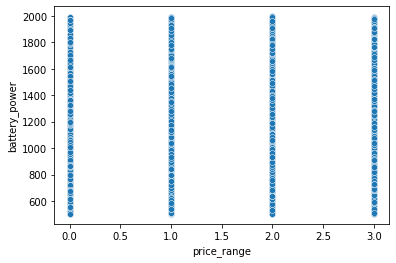

In [54]:
sns.scatterplot(df['price_range'],df['battery_power'])

In [57]:
from sklearn.feature_selection import SelectFromModel

In [58]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier


In [60]:
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
sel.fit(x_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                                 class_weight=None,
                                                 criterion='gini',
                                                 max_depth=None,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 max_samples=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100, n_jobs=None,
                                                 oob_score=False,

In [62]:
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
sel.fit(x_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                                 class_weight=None,
                                                 criterion='gini',
                                                 max_depth=None,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 max_samples=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100, n_jobs=None,
                                                 oob_score=False,

In [65]:
selected_feat= x.columns[(sel.get_support())]
len(selected_feat)

4

In [66]:
print(selected_feat)

Index(['battery_power', 'px_height', 'px_width', 'ram'], dtype='object')
